In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
import matplotlib.ticker as ticker
import matplotlib as mpl
from matplotlib.lines import Line2D
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D


In [2]:
df = pd.read_excel('Lauren.xlsx') 
df = df.sort_values('IntCal 13\nAge (ka)', ascending=True)
df

,Sample Name,∆47,∆47\nSE,No. Reps,Rejected Reps,δ18O\n‰ VPDB,δ18O\nSE,δ13C ‰ VPDB,δ13C\nSE,14C\nAge (ka ),14C Age SD,IntCal 13\nAge (ka),2𝜎 min,2𝜎 max,Elev. (m),Water Temperature (°C),Lat. (ºN),Long. (ºW),Ref.
3,SVCW 17-PT4,0.726,0.004,7,0,-3.8,0.06,3.8,0.10,8.09,0.11,9.01,8.63,9.31,1475,12.5,40.9764,119.8747,Santi et al. (2019)
21,SVDI 12-T5b,0.721,0.001,2,2,-3.7,0.02,3.4,0.01,9.47,0.04,10.71,10.58,10.79,1444,13.7,41.7180,119.9745,Ibarra et al. (2014)
6,SVDI 11-T14-1C,0.720,0.006,12,6,-2.8,0.09,3.6,0.06,10.79,0.05,12.70,12.64,12.76,1478,13.9,41.5911,120.0523,Ibarra et al. (2014)
4,SVDI 11-T14-1A,0.727,0.005,4,3,-2.6,0.10,3.6,0.18,10.79,0.05,12.70,12.64,12.76,1478,12.3,41.5911,120.0523,Ibarra et al. (2014)
5,SVDI 11-T14-1B,0.739,0.001,2,0,-2.9,0.01,4.0,0.05,10.79,0.05,12.70,12.64,12.76,1478,9.5,41.5911,120.0523,Ibarra et al. (2014)
15,SVDI 12-T14-1C,0.717,0.002,2,1,-2.5,0.12,3.6,0.01,10.79,0.05,12.71,12.64,12.76,1531,14.6,41.2191,119.9651,Ibarra et al. (2014)
26,SVDI 15-AE03,0.720,0.008,5,1,-3.0,0.18,3.5,0.09,12.09,0.05,13.96,13.79,14.10,1491,13.9,41.8616,120.0745,Egger et al. (2018)
23,SVDI 12-T9,0.731,0.004,11,2,-3.4,0.11,3.6,0.11,12.42,0.05,14.52,14.18,14.88,1509,11.4,41.4270,119.9709,Ibarra et al. (2014)
11,SVDI 12-T10-A,0.715,0.006,9,2,-3.6,0.14,3.6,0.08,12.60,0.07,14.96,14.94,15.18,1517,15.1,41.4269,119.9706,Ibarra et al. (2014)
12,SVDI 12-T10-B,0.726,0.004,9,1,-3.3,0.06,3.5,0.13,12.60,0.05,14.96,14.94,15.18,1517,12.5,41.4269,119.9706,Ibarra et al. (2014)


In [3]:
def Santi_Tw(D47):
    Tw = (((0.0502 * 10**6)/(D47 - 0.1108))**0.5) - 273.15
    return Tw

def Santi_Tw_upper_error(D47, D47_error):
    Tw = (((0.0502 * 10**6)/((D47 - D47_error) - 0.1108))**0.5) - 273.15
    return Tw

def Santi_Tw_lower_error(D47, D47_error):
    Tw = (((0.0502 * 10**6)/((D47 + D47_error) - 0.1108))**0.5) - 273.15
    return Tw

In [4]:
Tw_santi = Santi_Tw(df['∆47']).round(1)
Tw_santi_lower_error = Santi_Tw_lower_error(df['∆47'], df['∆47\nSE'], ).round(1)
Tw_santi_upper_error = Santi_Tw_upper_error(df['∆47'], df['∆47\nSE']).round(1)


df['AvgH2OTemp'] = Tw_santi
df['Tw lower error'] = Tw_santi_lower_error
df['Tw upper error'] = Tw_santi_upper_error
df['H2OTemp_error'] = Tw_santi - Tw_santi_lower_error


df['Age_ka'] = df['IntCal 13\nAge (ka)']
df['Age_ka_SD'] = ((df['2𝜎 max']/2)) - ((df['2𝜎 min']/2))
df['Age_ka_SD']


df

,Sample Name,∆47,∆47\nSE,No. Reps,Rejected Reps,δ18O\n‰ VPDB,δ18O\nSE,δ13C ‰ VPDB,δ13C\nSE,14C\nAge (ka ),...,Water Temperature (°C),Lat. (ºN),Long. (ºW),Ref.,AvgH2OTemp,Tw lower error,Tw upper error,H2OTemp_error,Age_ka,Age_ka_SD
3,SVCW 17-PT4,0.726,0.004,7,0,-3.8,0.06,3.8,0.10,8.09,...,12.5,40.9764,119.8747,Santi et al. (2019),12.5,11.6,13.4,0.9,9.01,0.340
21,SVDI 12-T5b,0.721,0.001,2,2,-3.7,0.02,3.4,0.01,9.47,...,13.7,41.7180,119.9745,Ibarra et al. (2014),13.7,13.4,13.9,0.3,10.71,0.105
6,SVDI 11-T14-1C,0.720,0.006,12,6,-2.8,0.09,3.6,0.06,10.79,...,13.9,41.5911,120.0523,Ibarra et al. (2014),13.9,12.5,15.3,1.4,12.70,0.060
4,SVDI 11-T14-1A,0.727,0.005,4,3,-2.6,0.10,3.6,0.18,10.79,...,12.3,41.5911,120.0523,Ibarra et al. (2014),12.3,11.1,13.4,1.2,12.70,0.060
5,SVDI 11-T14-1B,0.739,0.001,2,0,-2.9,0.01,4.0,0.05,10.79,...,9.5,41.5911,120.0523,Ibarra et al. (2014),9.5,9.3,9.8,0.2,12.70,0.060
15,SVDI 12-T14-1C,0.717,0.002,2,1,-2.5,0.12,3.6,0.01,10.79,...,14.6,41.2191,119.9651,Ibarra et al. (2014),14.6,14.1,15.1,0.5,12.71,0.060
26,SVDI 15-AE03,0.720,0.008,5,1,-3.0,0.18,3.5,0.09,12.09,...,13.9,41.8616,120.0745,Egger et al. (2018),13.9,12.0,15.8,1.9,13.96,0.155
23,SVDI 12-T9,0.731,0.004,11,2,-3.4,0.11,3.6,0.11,12.42,...,11.4,41.4270,119.9709,Ibarra et al. (2014),11.4,10.4,12.3,1.0,14.52,0.350
11,SVDI 12-T10-A,0.715,0.006,9,2,-3.6,0.14,3.6,0.08,12.60,...,15.1,41.4269,119.9706,Ibarra et al. (2014),15.1,13.7,16.5,1.4,14.96,0.120
12,SVDI 12-T10-B,0.726,0.004,9,1,-3.3,0.06,3.5,0.13,12.60,...,12.5,41.4269,119.9706,Ibarra et al. (2014),12.5,11.6,13.4,0.9,14.96,0.120


In [5]:
lat = df['Lat. (ºN)']
elev = df['Elev. (m)']/1000

In [6]:
def model4_AO(proxy_Tw, lat, elev):
    MAAT = (-0.0162) * np.power(proxy_Tw, 2) + (1.4369 * proxy_Tw) - 0.2282 * lat - 1.5486 * elev + 0.496

    return MAAT

In [7]:
def model3_AO(proxy_Tw, lat):
    MAAT = (-0.0141) * np.power(proxy_Tw, 2) + (1.6034 * proxy_Tw) - 0.1099 * lat - 8.7553

    return MAAT

In [8]:
def model2_AO(proxy_Tw):
    MAAT = (-0.0132) * np.power(proxy_Tw, 2) + (1.7664 * proxy_Tw) - 16.3695
    return MAAT

In [9]:
def model1_AO(proxy_Tw):
    MAAT = (1.3300 * proxy_Tw) - 13.8029
    return MAAT

In [10]:
def HS(Tw):
    MAAT_AMJ = (-0.0097)*np.power(Tw,2) + (1.379 * Tw) - 8.227
    MAAT_JJA = (-0.0055)*np.power(Tw,2) + (1.476 * Tw) - 18.915
    MAAT_AO = (-0.0146)*np.power(Tw,2) + (1.753 * Tw) - 16.079
   
    return MAAT_AMJ, MAAT_JJA, MAAT_AO

In [11]:
def MAAT_error_HS(Tw_error):
    quadrature = np.sqrt((Tw_error**2) + (3.36**2))
    return quadrature

In [12]:
def MAAT_error_AT_model1(Tw_error):
    quadrature = np.sqrt((Tw_error**2) + (3.1**2))
    return quadrature

In [13]:
def MAAT_error_AT_model2(Tw_error):
    quadrature = np.sqrt((Tw_error**2) + (2.9**2))
    return quadrature

In [14]:
def MAAT_error_AT_model3(Tw_error):
    quadrature = np.sqrt((Tw_error**2) + (2.7**2))
    return quadrature

In [15]:
def MAAT_error_AT_model4(Tw_error):
    quadrature = np.sqrt((Tw_error**2) + (2.4**2))
    return quadrature

In [16]:
df['MAAT HS error'] = MAAT_error_HS(df['H2OTemp_error'])

df['MAAT AT model 4 error'] = MAAT_error_AT_model4(df['H2OTemp_error'])
df['MAAT AT model 3 error'] = MAAT_error_AT_model3(df['H2OTemp_error'])
df['MAAT AT model 2 error'] = MAAT_error_AT_model2(df['H2OTemp_error'])
df['MAAT AT model 1 error'] = MAAT_error_AT_model1(df['H2OTemp_error'])


In [17]:
MAAT_pred_mod4 = model4_AO(df['AvgH2OTemp'], lat, elev)
MAAT_pred_mod3 = model3_AO(df['AvgH2OTemp'], lat)
MAAT_pred_mod2 = model2_AO(df['AvgH2OTemp'])
MAAT_pred_mod1 = model1_AO(df['AvgH2OTemp'])



MAAT_HS_pred = HS(df['AvgH2OTemp'])[2]

df['AT_MAAT_mod4'] = MAAT_pred_mod4
df['AT_MAAT_mod3'] = MAAT_pred_mod3
df['AT_MAAT_mod2'] = MAAT_pred_mod2
df['AT_MAAT_mod1'] = MAAT_pred_mod1


df['HS_MAAT'] = MAAT_HS_pred

In [18]:
df.to_csv('Lauren_2.csv')

In [19]:
df_LGM = df[(df['Age_ka'] > 19) & (df['Age_ka'] < 23)]
df_LGM['Age_ka']

7     19.21
16    19.49
30    19.56
32    19.82
18    20.02
9     20.84
13    21.13
10    21.22
8     21.25
27    21.43
31    21.46
17    21.82
28    22.07
20    22.18
19    22.70
Name: Age_ka, dtype: float64

In [20]:
df_o_e = df_LGM.copy()
df_o_e['TF4_MAAT_anom'] = df_o_e['AT_MAAT_mod4'] - 9.2
df_o_e['HS_MAAT_anom'] = df_o_e['HS_MAAT'] - 9.2
df_o_e.to_csv('lake_surprise_o_e.csv')

In [21]:
def generate_LGM_data(df, MAAT, MAAT_err):
    MAAT_mean = np.mean(df[MAAT])
    MAAT_err = np.sqrt(np.sum(np.power(df[MAAT_err],2))/len(df[MAAT_err]))/np.sqrt(len(df[MAAT_err]))
    modern = 9.2
    anom = MAAT_mean - modern
    anom_err = np.sqrt((MAAT_err**2) + (0.5**2))
    
    return MAAT_mean, MAAT_err, anom, anom_err


In [22]:
generate_LGM_data(df_LGM, 'HS_MAAT', 'MAAT HS error')

(5.059189599999997, 0.9788973388461121, -4.140810400000002, 1.0991997088791463)

In [23]:
generate_LGM_data(df_LGM, 'AT_MAAT_mod4', 'MAAT AT model 4 error')


(5.243508654666668,
 0.7678541528180987,
 -3.9564913453333315,
 0.9162968951164246)

In [24]:
generate_LGM_data(df_LGM, 'AT_MAAT_mod3', 'MAAT AT model 3 error')

(5.8643496393333345,
 0.8316249154516716,
 -3.3356503606666648,
 0.9703607576566563)

In [25]:
generate_LGM_data(df_LGM, 'AT_MAAT_mod2', 'MAAT AT model 2 error')

(5.2463832, 0.8753665898734465, -3.953616799999999, 1.0081005240880825)

In [26]:
generate_LGM_data(df_LGM, 'AT_MAAT_mod1', 'MAAT AT model 1 error')

(4.551100000000002, 0.9199275333778562, -4.648899999999998, 1.047027538638152)

In [27]:
# def anom(df_LGM):
#     AT_anom_mod1 = generate_LGM_data(df_LGM, 'AT_MAAT_mod1', 'MAAT AT model 1 error')[2]
#     AT_anom_mod2 = generate_LGM_data(df_LGM, 'AT_MAAT_mod2', 'MAAT AT model 2 error')[2]
#     AT_anom_mod3 = generate_LGM_data(df_LGM, 'AT_MAAT_mod3', 'MAAT AT model 3 error')[2]
#     AT_anom_mod4 = generate_LGM_data(df_LGM, 'AT_MAAT_mod4', 'MAAT AT model 4 error')[2]
#     HS_anom = generate_LGM_data(df_LGM, 'HS_MAAT', 'MAAT HS error')[2]

#     return  AT_anom_mod1, AT_anom_mod2, AT_anom_mod3, AT_anom_mod4, HS_anom

In [28]:
# def anom_error(df_LGM):
#     AT_anom_mod1 = generate_LGM_data(df_LGM, 'AT_MAAT_mod1', 'MAAT AT model 1 error')[3]
#     AT_anom_mod2 = generate_LGM_data(df_LGM, 'AT_MAAT_mod2', 'MAAT AT model 2 error')[3]
#     AT_anom_mod3 = generate_LGM_data(df_LGM, 'AT_MAAT_mod3', 'MAAT AT model 3 error')[3]
#     AT_anom_mod4 = generate_LGM_data(df_LGM, 'AT_MAAT_mod4', 'MAAT AT model 4 error')[3]

#     HS_anom = generate_LGM_data(df_LGM, 'HS_MAAT', 'MAAT HS error')[3]

#     return AT_anom_mod1, AT_anom_mod2, AT_anom_mod3, AT_anom_mod4, HS_anom

In [29]:
# anom_error_AT = np.sqrt((df['MAAT AT model 4 error']**2) + (1**2)).values
# anom_error_HS = np.sqrt((df['MAAT HS error']**2) + (1**2))

In [30]:
def generate_lowess(MAAT):
    # Get the time series data
    age = df['Age_ka']
    value = df[MAAT]

    # Perform Lowess regression
    lowess_result = lowess(value, age, frac = 0.3)

    # Extract the smoothed values and residuals
    smoothed_values = lowess_result[:, 1]
    residuals = value - smoothed_values

    # Calculate 1-sigma confidence intervals
    sigma = np.std(residuals)
    lower_ci = smoothed_values - sigma
    upper_ci = smoothed_values + sigma
    
    return age, value, smoothed_values, lower_ci, upper_ci

In [31]:
def generate_data(AT_MAAT_mod):
    age_Terrazas = generate_lowess(AT_MAAT_mod)[0]
    value_Terrazas = generate_lowess(AT_MAAT_mod)[1]
    smooth_val_Terrazas = generate_lowess(AT_MAAT_mod)[2]
    lower_ci_Terrazas = generate_lowess(AT_MAAT_mod)[3]
    upper_ci_Terrazas = generate_lowess(AT_MAAT_mod)[4]
   
    return age_Terrazas, value_Terrazas, smooth_val_Terrazas, lower_ci_Terrazas, upper_ci_Terrazas

In [32]:
age_HS = generate_lowess('HS_MAAT')[0]
value_HS = generate_lowess('HS_MAAT')[1]
smooth_val_HS = generate_lowess('HS_MAAT')[2]
lower_ci_HS = generate_lowess('HS_MAAT')[3]
upper_ci_HS = generate_lowess('HS_MAAT')[4]

age_Tw = generate_lowess('Age_ka')[0]
smooth_val_Tw = generate_lowess('AvgH2OTemp')[2]


## Figure 7a

/var/folders/_1/xcmb4cbj6dd5wy_54lgm1nw40000gn/T/ipykernel_14129/3538665559.py:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


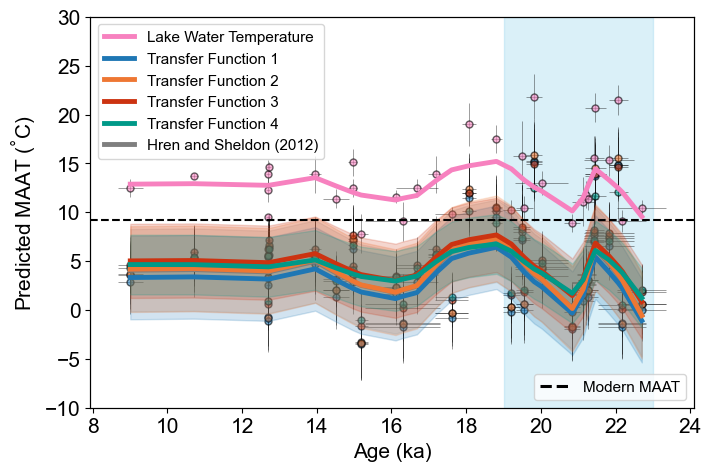

In [33]:
fs = 15
# Set up figure and gridspec
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = fs

fig = plt.figure(figsize=(12.5, 5.5))
grid = plt.GridSpec(13, 32, wspace=0.2, hspace=0)

# Primary axis
ax1 = plt.subplot(grid[0:12, 0:20])

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = fs

# Define colors
gray = plt.cm.tab10(7)
red = '#CC3311'
green = '#009988'
blue = plt.cm.tab10(0)
orange = '#EE7733'
blue_light = '#87CEEB'
pink = plt.cm.Set1(7)

# Plot scatter points first (with lower zorder)
ax1.errorbar(df['Age_ka'], df['HS_MAAT'], yerr=df['MAAT HS error'], xerr=df['Age_ka_SD'], marker='o', c=gray, ms=5, mec='k', ecolor='k', elinewidth=0.45, linestyle='none', alpha=0.6, zorder=1)
ax1.errorbar(df['Age_ka'], df['AT_MAAT_mod1'], yerr=df['MAAT AT model 1 error'], xerr=df['Age_ka_SD'], marker='o', c=blue, ms=5, mec='k', ecolor='k', elinewidth=0.45, linestyle='none', alpha=0.6, zorder=1)
ax1.errorbar(df['Age_ka'], df['AT_MAAT_mod2'], yerr=df['MAAT AT model 2 error'], xerr=df['Age_ka_SD'], marker='o', c=orange, ms=5, mec='k', ecolor='k', elinewidth=0.45, linestyle='none', alpha=0.6, zorder=1)
ax1.errorbar(df['Age_ka'], df['AT_MAAT_mod3'], yerr=df['MAAT AT model 3 error'], xerr=df['Age_ka_SD'], marker='o', c=red, ms=5, mec='k', ecolor='k', elinewidth=0.45, linestyle='none', alpha=0.6, zorder=1)
ax1.errorbar(df['Age_ka'], df['AT_MAAT_mod4'], yerr=df['MAAT AT model 4 error'], xerr=df['Age_ka_SD'], marker='o', c=green, ms=5, mec='k', ecolor='k', elinewidth=0.45, linestyle='none',alpha=0.6, zorder=1)

# Synchronize y-limits between primary and secondary axes
common_ylim = (-10, 30)
ax1.set_ylim(common_ylim)

# Secondary y-axis
ax1_right = ax1.twinx()
ax1_right.set_ylim(common_ylim)
ax1_right.tick_params(axis='y', which='both', bottom=False, top=False, labelright=False)
ax1_right.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

# Plot secondary axis scatter points
ax1.errorbar(df['Age_ka'], df['AvgH2OTemp'], yerr=df['H2OTemp_error'], xerr=df['Age_ka_SD'], marker='o', c=pink, ms=5, mec='k', ecolor='k', elinewidth=0.45, linestyle='none', alpha=0.6, zorder=1)

# Plot lines and fill confidence intervals on top (with higher zorder)
ax1.plot(age_HS, smooth_val_HS, color=gray, linewidth=3.5, label='Lowess Regression', zorder=3)
ax1.fill_between(age_HS, lower_ci_HS, upper_ci_HS, alpha=0.15, color=gray, zorder=2)

ax1.plot(generate_data('AT_MAAT_mod1')[0], generate_data('AT_MAAT_mod1')[2], color=blue, linewidth=3.5, label='Lowess Regression', zorder=3)
ax1.fill_between(generate_data('AT_MAAT_mod1')[0], generate_data('AT_MAAT_mod1')[3], generate_data('AT_MAAT_mod1')[4], alpha=0.2, color=blue, zorder=2)

ax1.plot(generate_data('AT_MAAT_mod2')[0], generate_data('AT_MAAT_mod2')[2], color=orange, linewidth=3.5, label='Lowess Regression', zorder=3)
ax1.fill_between(generate_data('AT_MAAT_mod2')[0], generate_data('AT_MAAT_mod2')[3], generate_data('AT_MAAT_mod2')[4], alpha=0.2, color=orange, zorder=2)

ax1.plot(generate_data('AT_MAAT_mod3')[0], generate_data('AT_MAAT_mod3')[2], color=red, linewidth=3.5, label='Lowess Regression', zorder=3)
ax1.fill_between(generate_data('AT_MAAT_mod3')[0], generate_data('AT_MAAT_mod3')[3], generate_data('AT_MAAT_mod3')[4], alpha=0.2, color=red, zorder=2)

ax1.plot(generate_data('AT_MAAT_mod4')[0], generate_data('AT_MAAT_mod4')[2], color=green, linewidth=3.5, label='Lowess Regression', zorder=3)
ax1.fill_between(generate_data('AT_MAAT_mod4')[0], generate_data('AT_MAAT_mod4')[3], generate_data('AT_MAAT_mod4')[4], alpha=0.2, color=green, zorder=2)

ax1_right.plot(age_Tw, smooth_val_Tw, color=pink, linewidth=3.5, label='Lowess Regression (H2O Temp)', zorder=3)

# Add vertical spans and horizontal lines
ax1.axhline(9.2, linestyle='dashed', color='k', zorder=4)
ax1.axvspan(19, 23, alpha=0.3, color=blue_light, zorder=0)

ax1.set_xlabel('Age (ka)', fontsize=fs)
ax1.set_ylabel('Predicted MAAT ($^\degree$C)', fontsize=fs)

# Define legend
def legend(ax):
    line1 = Line2D([0], [0], color=blue, linewidth=3.5)
    line2 = Line2D([0], [0], color=orange, linewidth=3.5)
    line3 = Line2D([0], [0], color=red, linewidth=3.5)
    line4 = Line2D([0], [0], color=green, linewidth=3.5)
    linehs = Line2D([0], [0], color=gray, linewidth=3.5)
    line_Tw = Line2D([0], [0], color=pink, linewidth=3.5)

    ax.legend(handles=[line_Tw, line1, line2, line3, line4, linehs], 
              labels=['Lake Water Temperature', 'Transfer Function 1', 'Transfer Function 2', 'Transfer Function 3', 'Transfer Function 4',
                      'Hren and Sheldon (2012)'],
              loc='upper left', frameon=True, fancybox=True, fontsize=11)

# Define legend
def legend2(ax):
    line = Line2D([0], [0], color='k', linestyle = '--', linewidth=2.2)

    ax.legend(handles=[line], 
              labels=['Modern MAAT'],
              loc='lower right', frameon=True, fancybox=True, fontsize=11)

legend(ax1)
legend2(ax1_right)

plt.tight_layout()
plt.savefig('Surprise_Santi.png', dpi=300, bbox_inches='tight')
plt.show()
